In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib import pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split as tts

In [26]:
df = pd.read_csv('/content/Dataset of BD Cricketers - Sheet1 (1).csv')

In [27]:
df. head()

,Comment,Sentiment,Like,Haha,Angry,Love,Care,Sad,Wow
0,হায়রে ধান্দাবাজ 😂\nপাবলিকের ইমোশন নিয়ে খেলা 😡,Negative,103,420,89,8,2,4,0
1,আমি জানতাম এই রকম কিছু হবে 🤣🤣 কারণ বাংলাদেশের ...,Neutral,43,161,0,2,1,0,0
2,জানতাম এটাই বলবেন 🥰,Neutral,4,6,0,0,0,0,0
3,নাটক তো ভালোই সিখছেন😄😃,Neutral,12,13,0,0,0,0,0
4,ভাই আমি তো বিকাশ চালাই 🐸,Positive,9,33,1,1,0,0,0


In [28]:
df.tail()

,Comment,Sentiment,Like,Haha,Angry,Love,Care,Sad,Wow
5697,"শান্ত ভাই, আয়ারল্যান্ডে সফররত সংশ্লিষ্ট সেই স...",Positive,2,17,0,0,0,0,0
5698,অসংখ্য ধন্যবাদ ভাই। অসাধারণ খেলা।,Positive,4,0,0,0,0,0,0
5699,যারা নাজমুল হোসেন শান্তকে নিয়ে নেতিবাচক মন্তব্...,Positive,5,0,0,2,0,0,0
5700,"নাজমুল হোসেন শান্ত, এখন আর সমালোচনার যোগ্য না,...",Positive,5,0,0,0,0,0,0
5701,"সমালোচনার জবাব এভাবে ওই দিতে হয়,, আজকে ম্যাচের...",Positive,3,0,0,0,0,0,0


In [30]:
df1 = df.dropna()
df1

,Comment,Sentiment,Like,Haha,Angry,Love,Care,Sad,Wow
0,হায়রে ধান্দাবাজ 😂\nপাবলিকের ইমোশন নিয়ে খেলা 😡,Negative,103,420,89,8,2,4,0
1,আমি জানতাম এই রকম কিছু হবে 🤣🤣 কারণ বাংলাদেশের ...,Neutral,43,161,0,2,1,0,0
2,জানতাম এটাই বলবেন 🥰,Neutral,4,6,0,0,0,0,0
3,নাটক তো ভালোই সিখছেন😄😃,Neutral,12,13,0,0,0,0,0
4,ভাই আমি তো বিকাশ চালাই 🐸,Positive,9,33,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
5697,"শান্ত ভাই, আয়ারল্যান্ডে সফররত সংশ্লিষ্ট সেই স...",Positive,2,17,0,0,0,0,0
5698,অসংখ্য ধন্যবাদ ভাই। অসাধারণ খেলা।,Positive,4,0,0,0,0,0,0
5699,যারা নাজমুল হোসেন শান্তকে নিয়ে নেতিবাচক মন্তব্...,Positive,5,0,0,2,0,0,0
5700,"নাজমুল হোসেন শান্ত, এখন আর সমালোচনার যোগ্য না,...",Positive,5,0,0,0,0,0,0


<Axes: xlabel='Sentiment', ylabel='Count'>

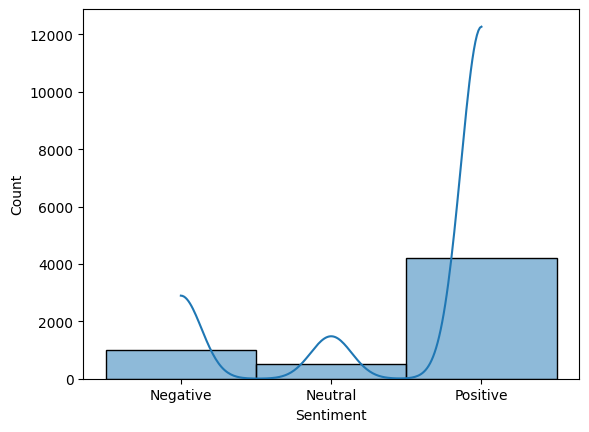

In [32]:
import seaborn as sns
sns.histplot(df['Sentiment'], kde=True)

In [33]:
df.isnull().sum()

Comment      0
Sentiment    0
Like         0
Haha         0
Angry        0
Love         0
Care         0
Sad          0
Wow          0
dtype: int64

In [34]:
df.Sentiment

0       Negative
1        Neutral
2        Neutral
3        Neutral
4       Positive
          ...   
5697    Positive
5698    Positive
5699    Positive
5700    Positive
5701    Positive
Name: Sentiment, Length: 5702, dtype: object

<Axes: xlabel='Sentiment', ylabel='count'>

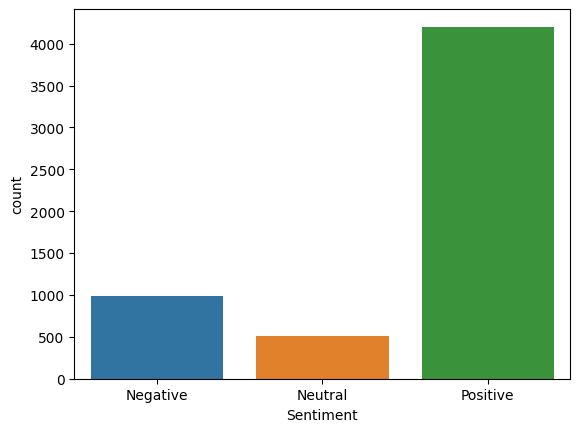

In [35]:
sns.countplot(x=df['Sentiment'])

In [36]:
import nltk
from spacy import load
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')
nlp = load('en_core_web_sm')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /root/nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!


In [37]:
df.columns

Index(['Comment', 'Sentiment', 'Like', 'Haha', 'Angry', 'Love', 'Care', 'Sad',
       'Wow'],
      dtype='object')

In [38]:
df.dropna(subset=['Comment'], inplace=True)
df.shape

(5702, 9)

In [39]:
df = df[['Sentiment','Comment']]

In [40]:
df

,Sentiment,Comment
0,Negative,হায়রে ধান্দাবাজ 😂\nপাবলিকের ইমোশন নিয়ে খেলা 😡
1,Neutral,আমি জানতাম এই রকম কিছু হবে 🤣🤣 কারণ বাংলাদেশের ...
2,Neutral,জানতাম এটাই বলবেন 🥰
3,Neutral,নাটক তো ভালোই সিখছেন😄😃
4,Positive,ভাই আমি তো বিকাশ চালাই 🐸
...,...,...
5697,Positive,"শান্ত ভাই, আয়ারল্যান্ডে সফররত সংশ্লিষ্ট সেই স..."
5698,Positive,অসংখ্য ধন্যবাদ ভাই। অসাধারণ খেলা।
5699,Positive,যারা নাজমুল হোসেন শান্তকে নিয়ে নেতিবাচক মন্তব্...
5700,Positive,"নাজমুল হোসেন শান্ত, এখন আর সমালোচনার যোগ্য না,..."


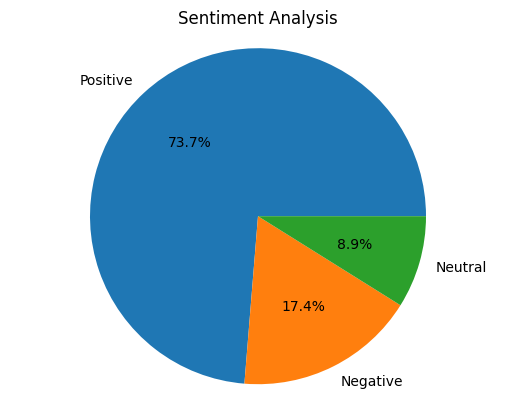

In [41]:
df_sentiment = df[df['Sentiment'] == True]
sentiment_counts = df['Sentiment'].value_counts()
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Analysis')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
# Show the plot
plt.show()

In [42]:
X = df['Comment']
y = df['Sentiment']

# train test split (66% train - 33% test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)
print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (3820,)
Testing Data :  (1882,)


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(3820, 1669)

In [44]:
# Training Logistic Regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_cv, y_train)

# transform X_test using CV
X_test_cv = cv.transform(X_test)
# generate predictions
predictions = lr.predict(X_test_cv)
predictions

array(['Neutral', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

****Accuracy, Precision, Recall, F1-Score****

In [45]:
# Classification Report
from sklearn.metrics import classification_report
y_test_cv = cv.transform(y_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    Negative       0.53      0.30      0.38       347
     Neutral       0.30      0.11      0.16       179
    Positive       0.78      0.93      0.85      1356

    accuracy                           0.74      1882
   macro avg       0.54      0.45      0.46      1882
weighted avg       0.69      0.74      0.70      1882



**Metrics**

              precision    recall  f1-score   support

    Negative       0.53      0.30      0.38       347
     Neutral       0.30      0.11      0.16       179
    Positive       0.78      0.93      0.85      1356

    accuracy                           0.74      1882
   macro avg       0.54      0.45      0.46      1882
weighted avg       0.69      0.74      0.70      1882



<Axes: >

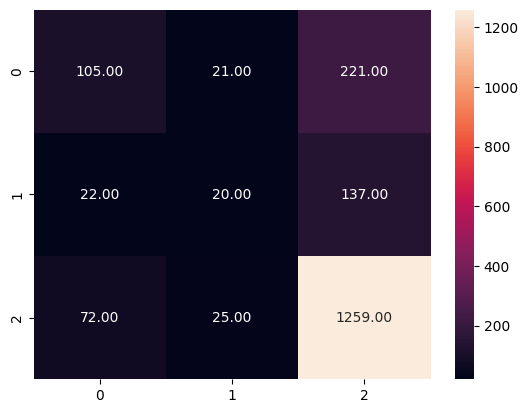

In [46]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))
cm = metrics.confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt = '.2f')

In [47]:
fig = px.histogram(df1, x="Like",  template = 'plotly', title = ' Like- Count',
                     text_auto = True,  opacity=0.8)
fig.update_layout(bargap=0.3)
fig.show()

In [48]:
fig = px.histogram(df1, x="Love",  template = 'plotly', title = ' Love- Count',
                     text_auto = True,  opacity=0.8)
fig.update_layout(bargap=0.3)
fig.show()

In [50]:
fig = px.histogram(df1, x="Angry",  template = 'plotly', title = ' Angry- Count',
                     text_auto = True,  opacity=0.8)
fig.update_layout(bargap=0.3)
fig.show()

In [51]:
fig = px.histogram(df1, x="Wow",  template = 'plotly', title = ' Wow- Count',
                     text_auto = True,  opacity=0.8)
fig.update_layout(bargap=0.3)
fig.show()

In [52]:
fig = px.histogram(df1, x="Sad",  template = 'plotly', title = ' Sad- Count',
                     text_auto = True,  opacity=0.8)
fig.update_layout(bargap=0.3)
fig.show()

In [53]:
fig = px.histogram(df1, x="Care",  template = 'plotly', title = ' Care- Count',
                     text_auto = True,  opacity=0.8)
fig.update_layout(bargap=0.3)
fig.show()

In [54]:
fig = px.histogram(df1, x="Haha",  template = 'plotly', title = ' Haha- Count',
                     text_auto = True,  opacity=0.8)
fig.update_layout(bargap=0.3)
fig.show()